# Housing Price Prediction
##### Input Features - size of house, number of bedrooms
##### Output Feature - price of house
##### Predict House Price given multiple features

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [2]:
# Hypothesis Function

def hypothesis(thetarg, x):
    return np.dot(x, thetarg)

In [3]:
# Cost function used to calculate the error between hypothesis and actual value over m training examples

def cost(x, y, thetarg, m):
    return float((1 / (2 * m)) * np.dot((hypothesis(thetarg, x) - y).T, (hypothesis(thetarg, x) - y)))

In [12]:
# Gradient Descent method to minimize cost function in configurable alpha and iterations

def gradient_descent(x, y, thetarg, m):
    jvec = []
    theta_history = []
    for i in range(num_iterations):
        theta_history.append(list(thetarg[:, 0]))
        jvec.append(cost(x, y, thetarg, m))
        for j in range(len(thetarg)):
            thetarg[j] = thetarg[j] - (alpha / m) * np.sum((hypothesis(thetarg, x) - y) *
                                                           np.array(x[:, j]).reshape(m, 1))
    return thetarg, theta_history, jvec

### Load data using Pandas and extract input features and output feature

In [32]:
muldata = pd.read_csv("/Users/akshatkumar/Downloads/machine-learning-ex1/ex1/ex1data2.txt")
indata = muldata.drop('price', axis=1)
indata.insert(0, "x0", 1)
outdata = muldata['price']

### Normalization to bring input features to same scale

In [33]:
normin = (indata - indata.mean()) / indata.std()
normin.fillna(0, inplace=True)
normout = (outdata - outdata.mean()) / outdata.std()

inmatrix = normin.values
outmatrix = normout.values.reshape(outdata.size, 1)

### Price Vizualization with respect to normalized input features

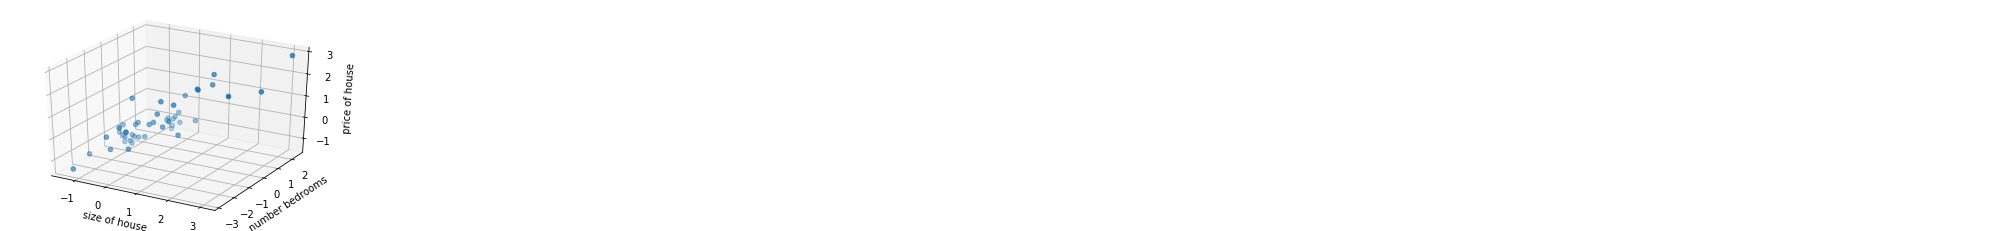

In [57]:
size = normin['size']
bedrooms = normin['bedrooms']
price = normout
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_label("Price Vizualization with respect to normalized input features")
ax.set_xlabel("size of house")
ax.set_ylabel("number bedrooms")
ax.set_zlabel("price of house")
ax.scatter(size, bedrooms, price)

### Setting Prameters for Multivariate Linear Regression

In [34]:
theta = np.zeros([inmatrix.shape[1], 1])
msize = len(outmatrix)
num_iterations = 1000
alpha = 0.01

### Running Gradient Descent for cost function convergence

In [35]:
theta_final, theta_hist, compute_cost = gradient_descent(inmatrix, outmatrix, theta, msize)

In [36]:
theta_final

array([[ 0.        ],
       [ 0.87859206],
       [-0.04701842]])

In [37]:
iterations = list(range(1, num_iterations))
compute_cost.pop(0)

0.4893617021276595

### Visualize Cost Function convergence with increase in number of iterations

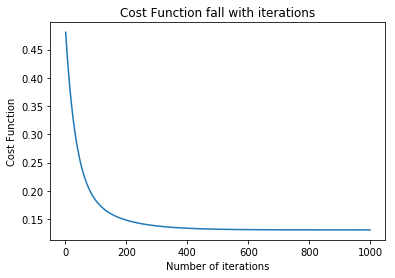

In [40]:
plt.title("Cost Function fall with iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.plot(iterations, compute_cost)

### PREDICTED Price Vizualization with respect to normalized input features

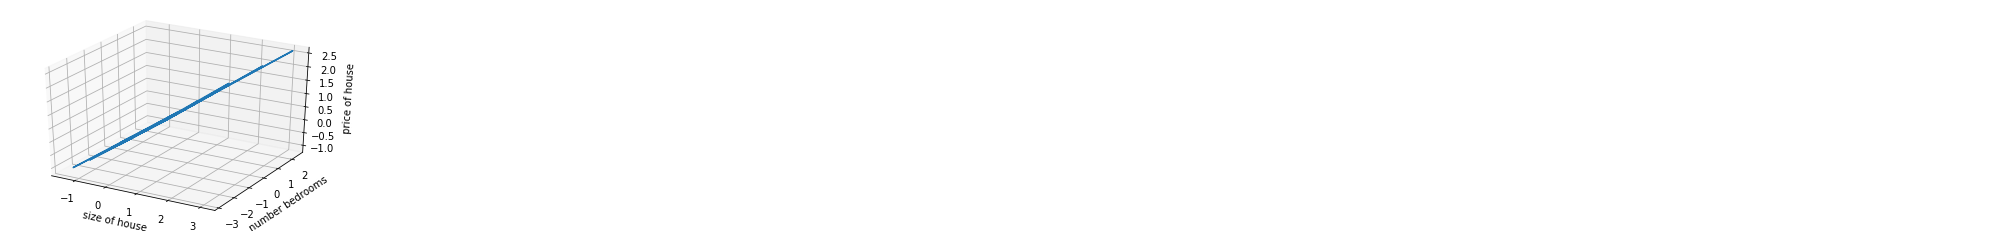

In [69]:
size = normin['size']
bedrooms = normin['bedrooms']
price = normout
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_label("Price Vizualization with respect to normalized input features")
ax.set_xlabel("size of house")
ax.set_ylabel("number bedrooms")
ax.set_zlabel("price of house")
ax.plot(size, bedrooms, hypothesis(theta_final,inmatrix).flatten())